In [57]:
import pandas as pd # pandas library use for data analysis
#first manually convert xls to csv
data = pd.read_csv("Folds_test.csv") # import csv file as dataframe
data # show dataframe 

,AT,V,AP,RH,PE
0,23.64,58.49,1011.40,74.20,445.75
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
...,...,...,...,...,...
9562,15.12,48.92,1011.80,72.93,462.59
9563,33.41,77.95,1010.30,59.72,432.90
9564,15.99,43.34,1014.20,78.66,465.96
9565,17.65,59.87,1018.58,94.65,450.93


In [58]:
import numpy as np # numpy is library use for matrix manipulation

# split a univariate sequence into samples
def split_sequence(sequence, n_steps): 
    X, y = list(), list() # initilize list for feature matrixs and labels
    for i in range(len(sequence)): # loop through number of sequence 
        end_ix = i + n_steps # initilize end value  
        if end_ix > len(sequence)-1: # check if end value is greater than length of sequence 
            break # use break to termninate the loop
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # seperate features and labels
        X.append(seq_x) # save feature in X list
        y.append(seq_y) # save label in Y lisr
    return np.array(X), np.array(y) # return X and Y

In [59]:
x1= np.array(data['AT'].values)  # save values of AT column in x1
x2= np.array(data['V'].values)  # save values of V column in x2
x3= np.array(data['AP'].values)  # save values of AP column in x3
x4= np.array(data['RH'].values)  # save values of RH column in x4
x5= np.array(data['PE'].values) # save values of PE column in x5

In [60]:
seq_len=1
x_1, y_1 = split_sequence(x1, seq_len) # call split sequence function 
x_2, y_2 = split_sequence(x2, seq_len) # call split sequence function 
x_3, y_3 = split_sequence(x3, seq_len) # call split sequence function 
x_4, y_4 = split_sequence(x4, seq_len) # call split sequence function 
x_5, y_5 = split_sequence(x5, seq_len) # call split sequence function 

In [61]:
from numpy import hstack # use hstack to merger different columns
X = hstack((x_1, x_2,x_3,x_4,x_5)) # merger 5 featuers into one matrix X 

In [62]:
y_1 = y_1.reshape((-1, 1)) # convert vector row to vector column matrix
y_2 = y_2.reshape((-1, 1)) # convert vector row to vector column matrix
y_3 = y_3.reshape((-1, 1)) # convert vector row to vector column matrix
y_4 = y_4.reshape((-1, 1)) # convert vector row to vector column matrix
y_5 = y_5.reshape((-1, 1)) # convert vector row to vector column matrix

In [63]:
Y = np.column_stack((y_1,y_2,y_3,y_4,y_5)) # use column wise merge to 5 labels matrix into Y

In [64]:
print(X.shape) # 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

(9566, 5)


In [87]:
from tensorflow.keras.models import Sequential # import keras sequential library
from tensorflow.keras.layers import Dense, LSTM,Dropout # import keras dense and lstm layers
from sklearn.model_selection import train_test_split # import train and test library
from sklearn.metrics import mean_squared_error # import metrics
import matplotlib.pyplot as plt # for visualization purpose

x = X.reshape(X.shape[0], X.shape[1], 1) # As lstm need three dimensions, so add one extra dimension
print("x:", x.shape, "y:", Y.shape) # print shape
 
in_dim = (x.shape[1], x.shape[2]) # save in input dimension
out_dim = Y.shape[1] # save in out_dim variable
print(in_dim) # print 
print(out_dim) # print 

xtrain, xtest, ytrain, ytest=train_test_split(x, Y, test_size=0.2) # call train_test_split function
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape) # print 




model = Sequential() # call sequential constructor
model.add(LSTM(200, input_shape=in_dim,return_sequences=True, activation="relu")) # configure lstm layers with 64 hidden neurons
model.add(Dropout(0.5))
#model.add(LSTM(32, return_sequences=True,activation="relu")) # 2nd layer is 32 hidden neurons
#model.add(Dropout(0.5))
model.add(LSTM(100,activation="relu")) # 2nd layer is 16 hidden neurons
model.add(Dropout(0.5))
model.add(Dense(out_dim,activation='linear')) # fully connected layer with 5 variable
model.compile(loss="mse", optimizer="adam") # use optimizer adam and loss is mse
model.summary() # overall summary 

history=model.fit(xtrain, ytrain, validation_split=0.1,epochs=30,shuffle=True, batch_size=64, verbose=2) # train the network

x: (9566, 5, 1) y: (9566, 5)
(5, 1)
5
xtrain: (7652, 5, 1) ytrian: (7652, 5)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 5, 200)            161600    
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 200)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 100)               120400    
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 505       
Total params: 282,505
Trainable params: 282,505
Non-trainable params: 0
_________________________________________________________________
Train on 6886 samples, validate on 7

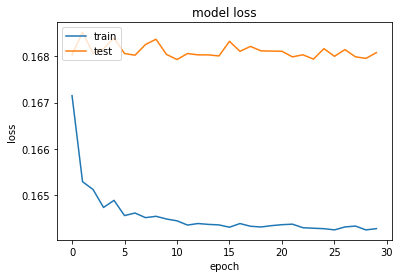

In [88]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
testpred = model.predict(xtest) # validate model on test data 
#print(testpred)
testpred = scaler.inverse_transform(testpred) # denormalized the data
testpred # show the test prediction result

array([[  19.576881,   54.147564, 1013.36475 ,   73.15017 ,  454.67633 ],
       [  19.63965 ,   54.26068 , 1013.3526  ,   73.236824,  454.4525  ],
       [  19.55056 ,   54.104084, 1013.37036 ,   73.153854,  454.76266 ],
       ...,
       [  19.61977 ,   54.2125  , 1013.3611  ,   73.23587 ,  454.53992 ],
       [  19.648376,   54.270798, 1013.354   ,   73.27191 ,  454.42432 ],
       [  19.579718,   54.15362 , 1013.36487 ,   73.15522 ,  454.6641  ]],
      dtype=float32)

In [90]:
xtest[0] # for one row 

array([[-0.44929178],
       [-0.42953737],
       [ 0.26206385],
       [ 0.6075067 ],
       [ 0.43655629]])

In [91]:
test_one_row = np.expand_dims(xtest[0], axis=0) #  add dummy dimension

In [92]:
testpred_row = model.predict(test_one_row) # test with one row 
testpred_row = scaler.inverse_transform(testpred_row) # denormalized the prediction
testpred_row # show the result

array([[  19.576881,   54.147564, 1013.36475 ,   73.15017 ,  454.67633 ]],
      dtype=float32)